In [3]:
import pandas as pd
from datetime import datetime

# Set your working directory
working_directory = "C:\\Users\\Rohith varma\\Documents\\cycle"

In [4]:
M1_2022 = pd.read_csv(working_directory + "\\202201-divvy-tripdata.csv")
M2_2022 = pd.read_csv(working_directory + "\\202202-divvy-tripdata.csv")
M3_2022 = pd.read_csv(working_directory + "\\202203-divvy-tripdata.csv")
M4_2022 = pd.read_csv(working_directory + "\\202204-divvy-tripdata.csv")
M5_2022 = pd.read_csv(working_directory + "\\202205-divvy-tripdata.csv")
M6_2022 = pd.read_csv(working_directory + "\\202206-divvy-tripdata.csv")
M7_2022 = pd.read_csv(working_directory + "\\202207-divvy-tripdata.csv")
M8_2022 = pd.read_csv(working_directory + "\\202208-divvy-tripdata.csv")
M9_2022 = pd.read_csv(working_directory + "\\202209-divvy-publictripdata.csv")
M10_2022 = pd.read_csv(working_directory + "\\202210-divvy-tripdata.csv")
M11_2022 = pd.read_csv(working_directory + "\\202211-divvy-tripdata.csv")
M12_2022 = pd.read_csv(working_directory + "\\202212-divvy-tripdata.csv")

In [5]:
M5_2022.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member


In [6]:
all_trips = pd.concat([M1_2022, M2_2022,M3_2022,M4_2022,M5_2022,M6_2022,M7_2022,M8_2022,M9_2022,M10_2022,M11_2022,M12_2022], ignore_index=True)


In [7]:
all_trips["date"] = pd.to_datetime(all_trips["started_at"]).dt.date
all_trips["month"] = pd.to_datetime(all_trips["date"]).dt.strftime("%m")
all_trips["day"] = pd.to_datetime(all_trips["date"]).dt.strftime("%d")
all_trips["year"] = pd.to_datetime(all_trips["date"]).dt.strftime("%Y")
all_trips["day_of_week"] = pd.to_datetime(all_trips["date"]).dt.strftime("%A")

In [8]:
all_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2022-01-13,01,13,2022,Thursday
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665968,42.012560,-87.674367,casual,2022-01-10,01,10,2022,Monday
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,2022-01-25,01,25,2022,Tuesday
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,2022-01-04,01,04,2022,Tuesday
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,2022-01-20,01,20,2022,Thursday


In [9]:
all_trips["ride_length"] = (pd.to_datetime(all_trips["ended_at"]) - pd.to_datetime(all_trips["started_at"])).dt.total_seconds()

In [10]:
all_trips = all_trips.dropna()

all_trips = all_trips.replace("", pd.NA).dropna()

In [13]:
all_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week,ride_length
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2022-01-13,01,13,2022,Thursday,177.0
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665968,42.012560,-87.674367,casual,2022-01-10,01,10,2022,Monday,261.0
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,2022-01-25,01,25,2022,Tuesday,261.0
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,2022-01-04,01,04,2022,Tuesday,896.0
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,2022-01-20,01,20,2022,Thursday,362.0


In [15]:
average_ride_length = all_trips["ride_length"].mean()

In [16]:
average_ride_length

1025.710490552392

In [17]:
max_ride_length = all_trips["ride_length"].max()

In [18]:
max_ride_length

2061244.0000000002

In [19]:
rides_per_day = all_trips['day_of_week'].value_counts().reset_index()

In [22]:
all_trips["weekday"] = pd.to_datetime(all_trips["started_at"]).dt.day_name()

In [20]:
rides_per_day

,index,day_of_week
0,Saturday,705623
1,Thursday,645897
2,Wednesday,616371
3,Friday,608851
4,Tuesday,607639
5,Sunday,599049
6,Monday,585930


In [23]:
ridership_analysis = all_trips.groupby(["member_casual", "weekday"]).agg(
    number_of_rides=pd.NamedAgg(column="ride_length", aggfunc="count"),
    average_duration=pd.NamedAgg(column="ride_length", aggfunc="mean")
).reset_index()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
ridership_analysis

,member_casual,weekday,number_of_rides,average_duration
0,casual,Friday,248797,1341.421971
1,casual,Monday,210759,1490.032563
2,casual,Saturday,367344,1605.944243
3,casual,Sunday,301316,1633.398847
4,casual,Thursday,230007,1284.194472
5,casual,Tuesday,196390,1286.402256
6,casual,Wednesday,203576,1243.078344
7,member,Friday,360054,733.614350
8,member,Monday,375171,721.966143
9,member,Saturday,338279,838.878228


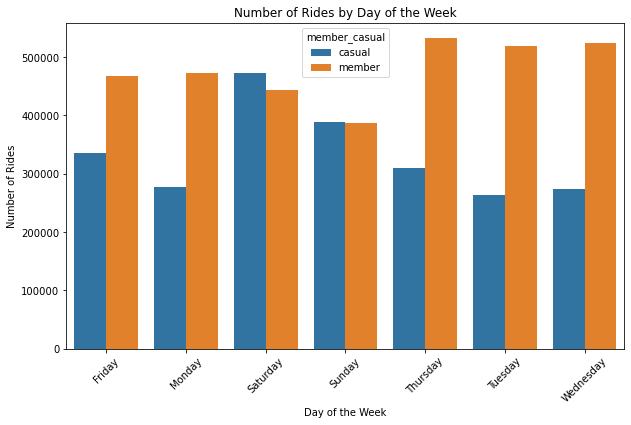

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x="weekday", y="number_of_rides", hue="member_casual", data=ridership_analysis)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by Day of the Week")
plt.xticks(rotation=45)
plt.show()

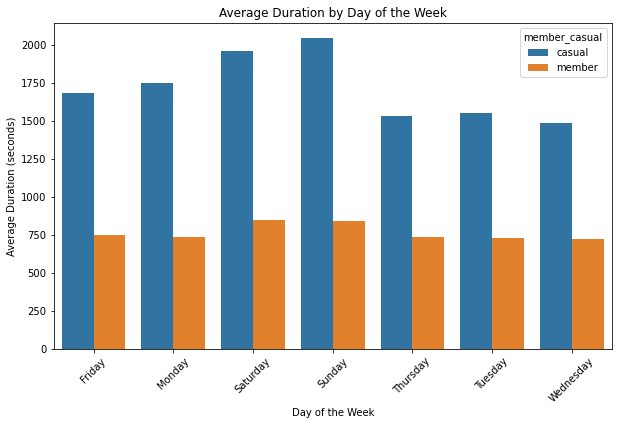

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x="weekday", y="average_duration", hue="member_casual", data=ridership_analysis)
plt.xlabel("Day of the Week")
plt.ylabel("Average Duration (seconds)")
plt.title("Average Duration by Day of the Week")
plt.xticks(rotation=45)
plt.show()

In [24]:
all_trips.to_csv("C:\\Users\\Rohith varma\\Documents\\cycleride_2022.csv", index=False)

In [1]:
all_trips.head()

NameError: name 'all_trips' is not defined